In [1]:
#import libraies
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
import numpy as np
from matplotlib import pyplot as plt
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering ('th')
import cv2
import matplotlib.pyplot as plt
from scipy import misc
from collections import Counter
from PIL import Image
from keras.models import model_from_json

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
from matplotlib import pyplot as pt 
import matplotlib.cm as cm

In [4]:
#importing MNIST data set and segregating into train and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

So here a single digit is represent in an array
Lets see how a single digit looks

In [5]:
print (x_train[600])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  16 170 255 254 219  12
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  29 238 254 252 24

lets see in a format we humans can make out

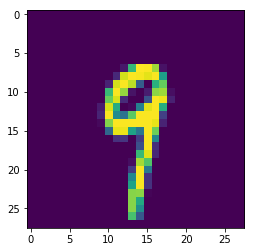

In [7]:
pt.imshow(x_train[600])

The corresponding dependent output would be

In [8]:
print(y_train[600])


9


In [11]:
x_train.shape

(60000, 28, 28)

So this means that there are 60K inputs each of dimension 28x28 pixels

In [9]:
type (x_train)

numpy.ndarray

In [10]:
(y_train).shape

(60000,)

In [11]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [12]:
#Divided the data into subsets of training and testing.
(X_train, y_train), (X_test, y_test) = mnist.load_data ()

# Since we are working in gray scale we can
# set the depth to the value 1.
X_train = X_train.reshape (X_train.shape [0], 1, 28, 28) .astype ('float32')
X_test = X_test.reshape (X_test.shape [0], 1, 28, 28) .astype ('float32')

# We normalize our data according to the
# gray scale. The floating point values are in the range [0,1], instead of [.255]
X_train = X_train / 255
X_test = X_test / 255

# Converts y_train and y_test, which are class vectors, to a binary class array (one-hot vectors)
y_train = np_utils.to_categorical (y_train)
y_test = np_utils.to_categorical (y_test)

# Number of digit types found in MNIST. In this case, the value is 10, corresponding to (0,1,2,3,4,5,6,7,8,9).
num_classes = y_test.shape [1]

In [13]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
model = Sequential ()

# Convolution2D will be our input layer. We can observe that it has
# 30 feature maps with size of 5 × 5 and an activation function of type ReLU. 
model.add (Conv2D (30, (5, 5), input_shape = (1, 28, 28), activation = 'relu'))

# The MaxPooling2D layer will be our second layer where we will have a sample window of size 2 x 2
model.add (MaxPooling2D (pool_size = (2, 2)))

# A new convolutional layer, with 15 feature maps of size 3 × 3, and activation function ReLU 
model.add (Conv2D (15, (3, 3), activation = 'relu'))

# A new subsampling with a 2x2 dimension pooling.
model.add (MaxPooling2D (pool_size = (2, 2)))

# We include a dropout with a 20% probability (you can try other values)
model.add (Dropout (0.2))

# We need to convert the output of the convolutional layer, so that it can be used as input to the densely connected layer that is next. 
# What this does is "flatten / flatten" the structure of the output of the convolutional layers, creating a single long vector of features
# that will be used by the Fully Connected layer.
model.add (Flatten ())

# Fully connected layer with 128 neurons.
model.add (Dense (128, activation = 'relu'))

# Followed by a new fully connected layer with 64 neurons
model.add (Dense (64, activation = 'relu'))

# Followed by a new fully connected layer with 32 neurons
model.add (Dense (32, activation = 'relu'))

# The output layer has the number of neurons compatible with the 
# number of classes to be obtained. Notice that we are using a softmax activation function,
model.add (Dense (num_classes, activation = 'softmax', name = 'preds'))

# Configure the entire training process of the neural network
model.compile (loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:

model.summary ()

model.fit (X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 200)

scores = model.evaluate (X_test, y_test, verbose = 0)
print ("\ nacc:% .2f %%"% (scores [1] * 100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               48128     
__________

This CNN has achevied an accuaracy 98.9%

Now lets test it on some real world data

In [15]:
#adding real world handwritten digits for testing
ImageListReal=[]
ImageListReal.append("1h.jpg")
ImageListReal.append("2h.jpg")
ImageListReal.append("3h.jpg")
ImageListReal.append("4h.jpg")
ImageListReal.append("5h.jpg")
ImageListReal.append("6h.jpg")
ImageListReal.append("7h.jpg")
ImageListReal.append("8h.jpg")
ImageListReal.append("9h.jpg")
ImageListReal.append("0h.jpg")

F:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


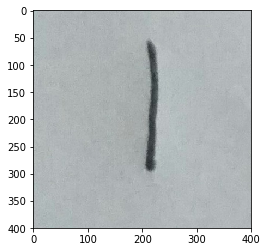

F:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
F:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # This is added back by InteractiveShellApp.init_path()
F:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `bytescale` is deprecated!
`bytescale` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.


[1]


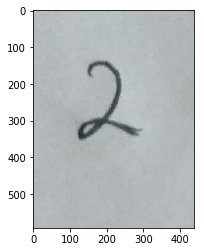

[3]


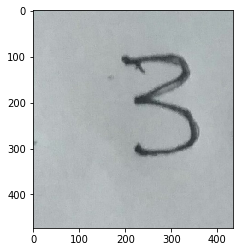

[3]


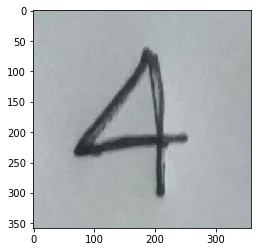

[4]


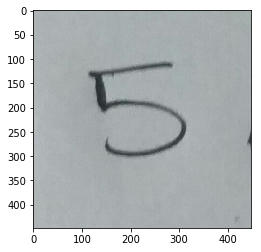

[5]


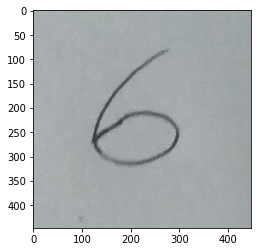

[6]


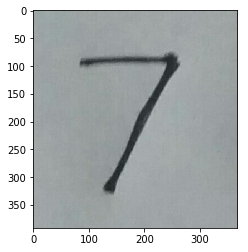

[7]


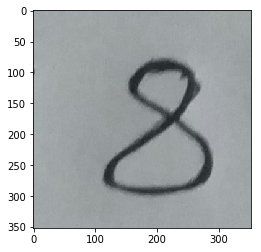

[8]


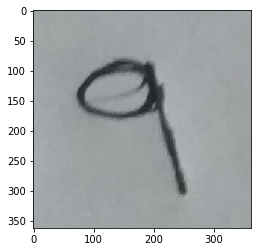

[9]


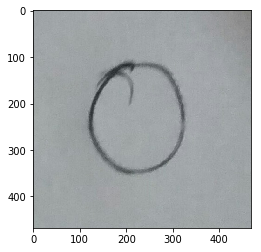

[0]


In [16]:
#converting the test data into the input format
for item in ImageListReal:    
    #printing the original image
    pt.imshow(misc.imread(item))
    pt.show()
    # imverting the image
    img = misc.imread(item)
    img = (255 - cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)) / 255

    # resizing image into 8X8 matrix
    img = misc.imresize(img, (28, 28))
    img = img.astype('float32')

    #since the training happend in lighter background we need to make sure the test data is in the same way
    #else convert it to that
    #flattening to 1d so as to find out the most common pixel (255 or 0)
    d= Counter(img.flat).most_common(1)
    a= d[0]
    if a[0] == 255:
        for item in img:
            img[img == 0] = 1
        for item in img:
            img[img == 255] = 0
        for item in img:
            img[img == 1] = 255

    img = misc.bytescale(img, high=16, low=0)
    flat_img = img.reshape(1, 1, 28, 28)
    result = model.predict_classes(flat_img)
    
    print (result)

It has predicted all the test images with 100 % accuracy